Crop recommendation system.

A Crop Recommendation System suggests the most suitable crops to grow based on factors like soil type, weather conditions, temperature, rainfall, and nutrient levels of soil. By using basic data analysis and ML, it helps farmers make informed decisions to improve yield and reduce costs.

The dataset consists of 2200 entries and 8 columns. The first 7 columns — ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH', 'Rainfall'] — serve as input features that influence the prediction of the most suitable crop. The system can recommend one of 22 different crops, including ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'], based on these input values.

Here's what each feature represents:

N: Nitrogen content in the soil

P: Phosphorous content in the soil

K: Potassium content in the soil

Temperature: Measured in degrees Celsius

Humidity: Relative humidity in percentage

pH: Acidity or alkalinity of the soil

Rainfall: Measured in millimeters

Target Variable: Crop

Dataset link: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset


1) EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score

df = pd.read_csv('Crop.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


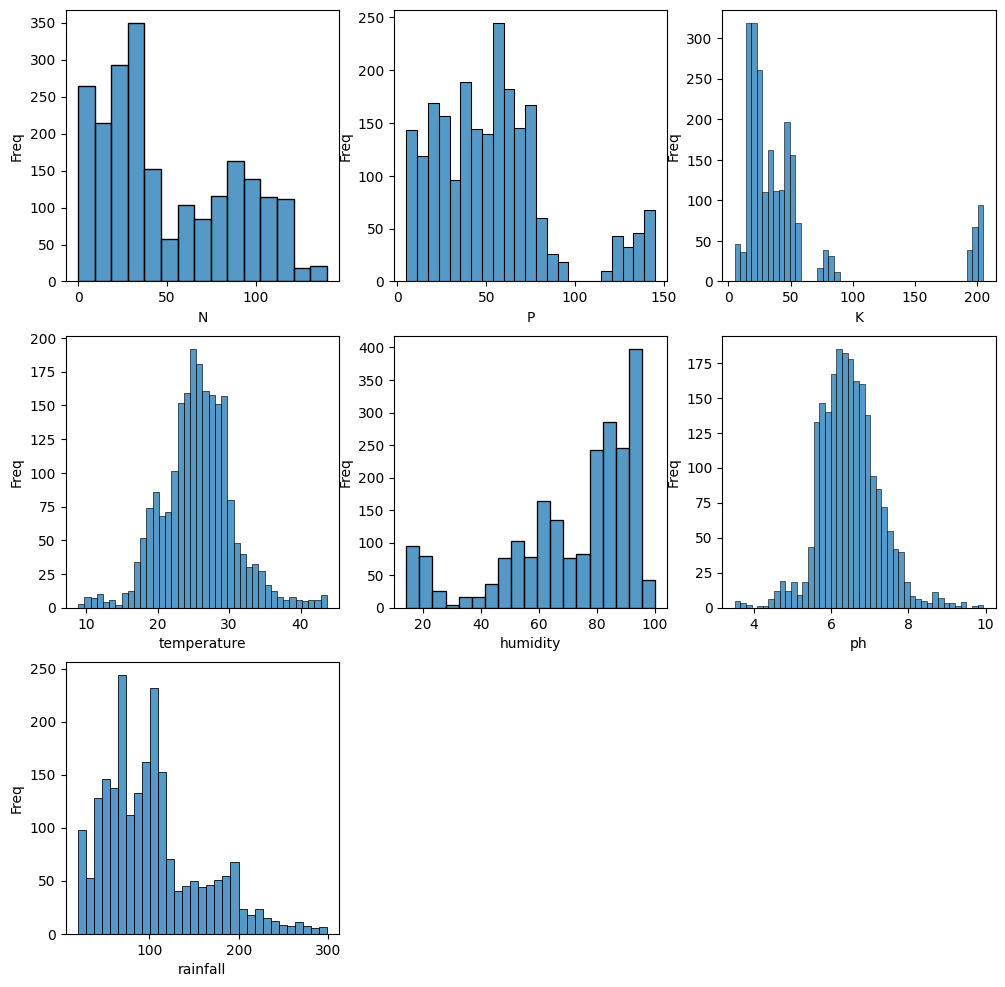

In [4]:
# histograms for distributions
numeric_columns = df.select_dtypes(include='number')
plt.figure(figsize=(12,12))
for i,col in enumerate(numeric_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(x=df[col])
    plt.ylabel('Freq')
plt.show()

In [5]:
# distribution of target variable:
df['label'].value_counts()

# target variable is evenly distributed.

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

2) Model building

In [6]:
models = {
    0: LogisticRegression(),
    1: RandomForestClassifier(),
    2: DecisionTreeClassifier()
}
accuracy = []
precision = []
recall = []

x = df.drop(columns='label', inplace=False)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

for j in range(3):
    temp_model = models[j]
    temp_model.fit(x_train,y_train)
    predictions = temp_model.predict(x_test)
    accuracy.append(float(accuracy_score(y_test, predictions)))
    precision.append(float(precision_score(y_test, predictions,average='macro')))
    recall.append(float(recall_score(y_test, predictions, average='macro')))


# scaling features for knn
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled,y,test_size=0.2,random_state=1,stratify=y)
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train2,y_train2)
y_pred2 = knnmodel.predict(x_test2)
accuracy.append(float(accuracy_score(y_test2, y_pred2)))
precision.append(float(precision_score(y_test2, y_pred2,average='macro')))
recall.append(float(recall_score(y_test2, y_pred2, average='macro')))

print(accuracy)
print(precision)
print(recall)



c:\Users\91992\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9636363636363636, 0.9977272727272727, 0.9931818181818182, 0.9840909090909091]
[0.9647320781292074, 0.9978354978354979, 0.9935064935064936, 0.985133805588351]
[0.9636363636363634, 0.9977272727272727, 0.9931818181818183, 0.984090909090909]


3) Comparision

In [7]:


metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN'],
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

print(metrics_df)
metrics_df.to_csv('metrics_df.csv')


                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.963636   0.964732  0.963636
1        Random Forest  0.997727   0.997835  0.997727
2        Decision Tree  0.993182   0.993506  0.993182
3                  KNN  0.984091   0.985134  0.984091


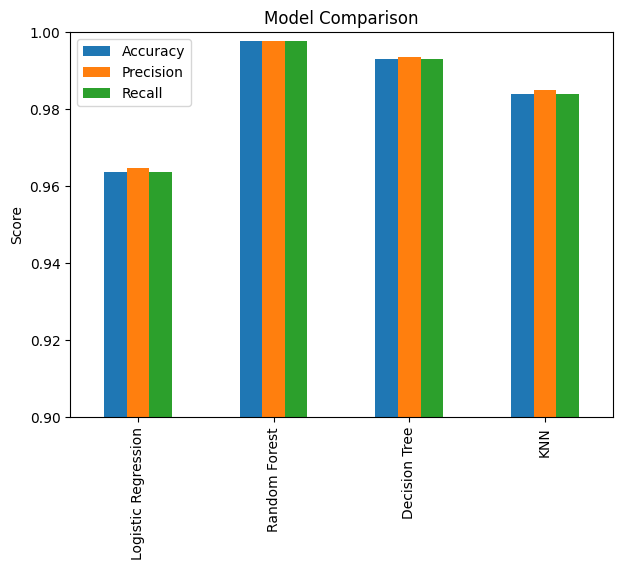

In [8]:

# Visualizing comparision:

models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
df2 = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}, index=models)
df2.plot(kind='bar', figsize=(7, 5))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)  # zoomed for better comparison
plt.legend()
plt.show()
